# Machine Learning development over Spotify data 🎶

## Summary
   * Chapter 1: Exploratory Analysis 🕵️‍♂️
   * Chapter 2: Data Pre-process ⚙️
   * Chapter 3: Dataset division ➗
   * Chapter 4: Baseline of the First Model 📈
   * Chapter 5: Model Validation 🧪
   * Chapter 6: Resample the data and fit the selected model 🔄🤖
   * Chapter 7: Apply the result to the test data and save the result 💾

## Chapter 1: Exploratory Analysis 🕵️‍♂️

Let's get to know our Spotify dataset. For that, we need to install necessary libraries, import them, load the dataset into a Pandas DataFrame and, finally, explore and visualize the data.

### 1.1. Install necessary libraries 📦
Ensure you have *Pandas* *matplotlib* and *seaborn* installed in your Jupyter environment. You can install them using the following commands.


In [216]:
pip install pandas numpy seaborn matplotlib imbalanced-learn scikit-learn

Note: you may need to restart the kernel to use updated packages.


### 1.2. Import required libraries 📚
Let's import the necessary libraries in your Jupyter Notebook.

In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

import numpy as np
from numpy import random

# Improve visualization
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)

# Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

# Evaluation metrics
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix, auc, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# Data resampling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

# Others
import time
import pickle
import warnings
from scipy import interp
from pprint import pprint
from scipy.stats import norm
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# Warning messages
warnings.filterwarnings("ignore")

### 1.3. Load Data into Pandas DataFrame 📅
Read the dataset into a Pandas DataFrame. Pandas supports various data formats, such as CSV, Parquet, JSON, etc. In our case, it is a CSV file located in the *asset* folder.

In [218]:
df = pd.read_csv("asset/dataset.csv")

### 1.4. Explore the Data 🔍
Finally, it's time to explore the loaded DataFrame using Spark SQL and DataFrame API functions. Here are a few examples:

* Display schema information

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

* Show the first few rows of the DataFrame

In [220]:
df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


* Display basic statistics of the DataFrame

In [221]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


* Count number of unique values in each column

In [222]:
n = df.nunique(axis=0)
print(n)

Unnamed: 0          114000
track_id             89741
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50697
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45653
time_signature           5
track_genre            114
dtype: int64


* Song count by artist

In [223]:
print(df['artists'].value_counts())

artists
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich Tchaikovsky;National Philharmonic Orchestra;Richard Bonynge      1
tstewart;Ólafur Arnalds                                                       1
Jesus Culture                                                                 1
Name: count, Length: 31437, dtype: int64


* Top 100 songs versus the entire dataset

In [224]:
sorted_df = df.sort_values('popularity', ascending = False).head(100)
sorted_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
81051,81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
81210,81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop
89411,89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,...,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton


* Top 5 Popular artists

In [225]:
artists_popularity_df = df[['artists', 'popularity']]
top_artists = artists_popularity_df.groupby("artists").mean().sort_values(by='popularity', ascending=False).reset_index()
top_artists.head()

,artists,popularity
0,Sam Smith;Kim Petras,100.0
1,Bizarrap;Quevedo,99.0
2,Manuel Turizo,98.0
3,Bad Bunny;Chencho Corleone,97.0
4,Bad Bunny;Bomba Estéreo,94.5


* Top 5 longest tracks

In [226]:
# Selecting top 5 long tracks
long_tracks = df[["track_name", "artists", "duration_ms"]].sort_values(by="duration_ms", ascending=False)[:5]

# Function to convert milliseconds to hh:mm:ss
def ms_to_hms(duration_ms):
    seconds, milliseconds = divmod(duration_ms, 1000)
    minutes, seconds = divmod(seconds, 60)
    hours, minutes = divmod(minutes, 60)
    return "{:02}:{:02}:{:02}".format(int(hours), int(minutes), int(seconds))

# Applying the conversion function to the duration_ms column
long_tracks["duration_hms"] = long_tracks["duration_ms"].apply(ms_to_hms)

# Displaying the result
long_tracks

,track_name,artists,duration_ms,duration_hms
73617,Unity (Voyage Mix) Pt. 1,Tale Of Us,5237295,01:27:17
10984,Crossing Wires 002 - Continuous DJ Mix,Timo Maas,4789026,01:19:49
10935,Crossing Wires 002 - Continuous DJ Mix,Timo Maas,4789026,01:19:49
24348,The Lab 03 - Continuous DJ Mix Part 1,Seth Troxler,4730302,01:18:50
73840,Amnesia Ibiza Underground 10 DJ Mix,Loco Dice,4563897,01:16:03


* Top 5 most trending genre

In [227]:
trend_genre = df[["track_genre", "popularity"]].sort_values(by="popularity", ascending=False)[:5]
trend_genre

,track_genre,popularity
20001,dance,100
81051,pop,100
51664,hip-hop,99
81210,pop,98
89411,reggaeton,98


* Top 5 most danceable songs

In [228]:
danceable = df[["track_name", "artists", "danceability"]].sort_values(by="danceability", ascending=False)[:5]
danceable

,track_name,artists,danceability
111635,Sol Clap,Quantic,0.985
66576,Medicaid Baby,That Girl Lay Lay,0.984
24916,Inspiration,Delano Smith,0.983
73374,Daily Routines,Oliver Schories,0.982
66793,"Featuring Mixx Master Lee, Red Rum & J. Smoov ...",Mixx Master Lee,0.981


### 1.5. Check null values ❓

In [229]:
# Sort variables in descending order based on their missing values
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

artists             0.000009
album_name          0.000009
track_name          0.000009
Unnamed: 0          0.000000
mode                0.000000
time_signature      0.000000
tempo               0.000000
valence             0.000000
liveness            0.000000
instrumentalness    0.000000
acousticness        0.000000
speechiness         0.000000
key                 0.000000
loudness            0.000000
track_id            0.000000
energy              0.000000
danceability        0.000000
explicit            0.000000
duration_ms         0.000000
popularity          0.000000
track_genre         0.000000
dtype: float64

In [230]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

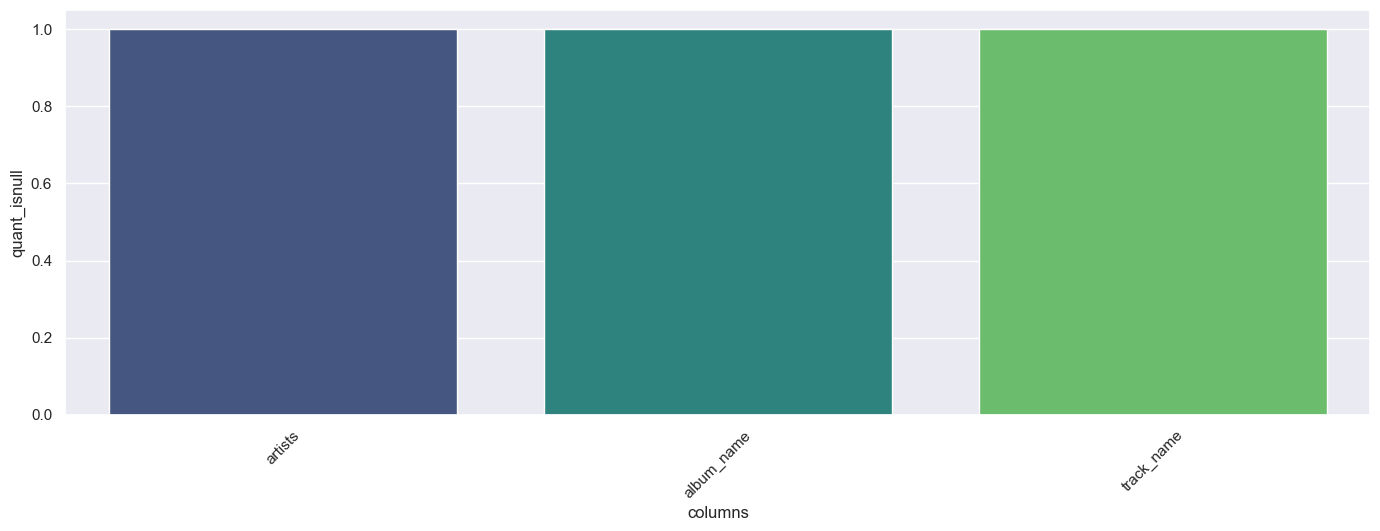

In [231]:
# Function that generates a bar chart with columns and the frequency of missing data.
def missing_visualization(df):
  # Calculate the number of missing values for each column
  quant_isnull = df.isnull().sum()
  columns = df.columns
  dic = {"columns": [], "quant_isnull": []}

  # Create a dictionary with columns and their corresponding missing values
  for column, quant in zip(columns, quant_isnull):
    if quant > 0:
      dic["columns"].append(column)
      dic["quant_isnull"].append(quant)

  # Create a DataFrame from the dictionary
  df = pd.DataFrame(dic)

  # Plot a bar chart using seaborn
  plt.figure(figsize=(15, 5))
  sns.barplot(x=df["columns"], y=df["quant_isnull"], data=df, palette="viridis")
  plt.xticks(rotation=45);

missing_visualization(df)


We can see that we have missing values ​​in our dataset. We will need to deal with them later.

### 1.6. Visualize the data 📉
We can use matplotlib to plot charts. Let's create three charts, but first we need to convert Spark DataFrame to Pandas DataFrame for visualization.

* Bar Chart for Genre Distribution:
  - Visualize the distribution of track genres in the dataset.
  - X-axis: Genres
  - Y-axis: Count of tracks in each genre

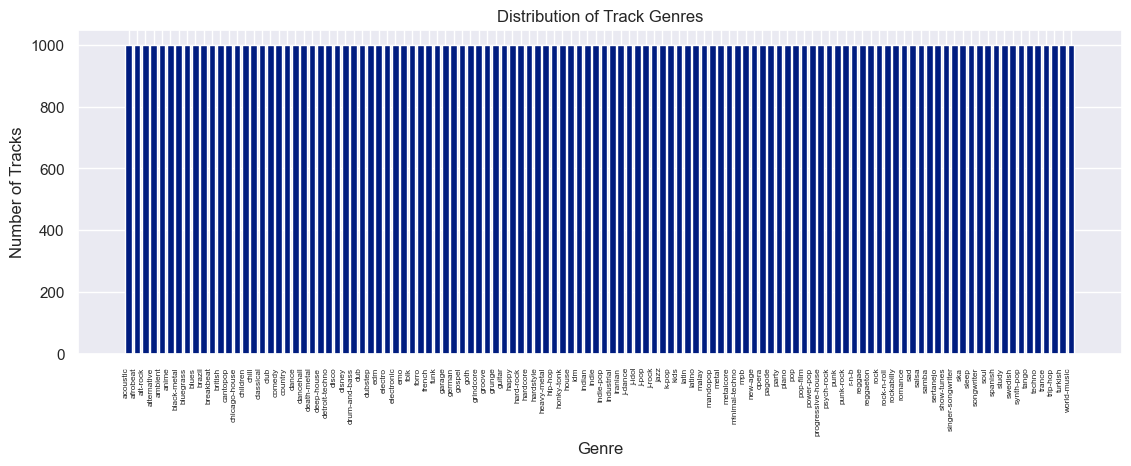

In [232]:
plt.figure(figsize=(12, 4))
genre_counts = df['track_genre'].value_counts().sort_index()
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Track Genres')
plt.xticks(rotation=90, ha='right', fontsize=6)  # Rotate X labels for better visibility
plt.show()

* Scatter Plot for Danceability vs. Energy:
  - Explore the relationship between danceability and energy of the tracks.
  - X-axis: Danceability
  - Y-axis: Energy

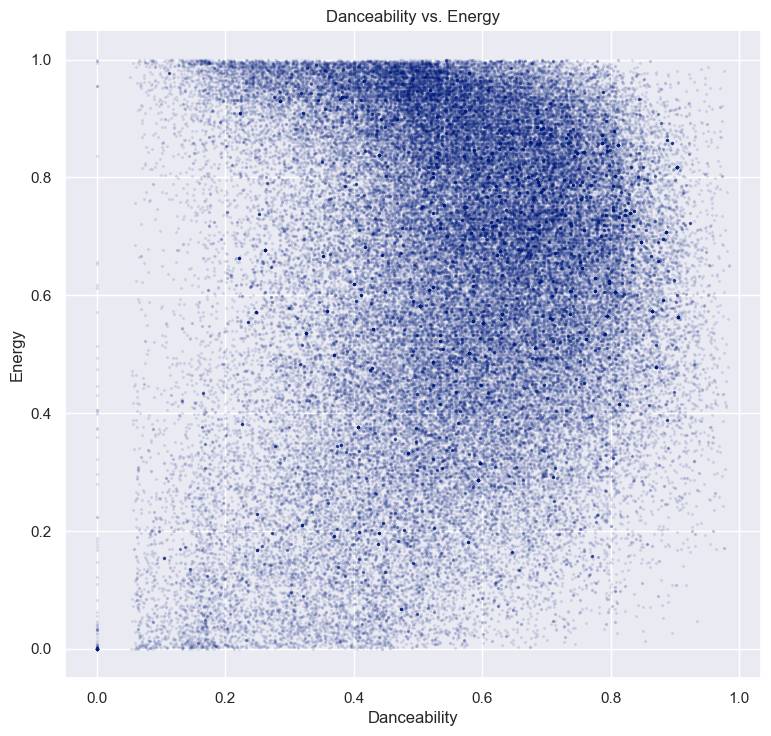

In [233]:
df['danceability'] = pd.to_numeric(df['danceability'], errors='coerce')
df['energy'] = pd.to_numeric(df['energy'], errors='coerce')
plt.figure(figsize=(8, 8))
plt.scatter(df['danceability'], df['energy'], alpha=0.08, s=2)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Danceability vs. Energy')
plt.show()

* Histogram for Track Popularity:
  - Understand the popularity distribution of the tracks.
  - X-axis: Popularity
  - Y-axis: Frequency

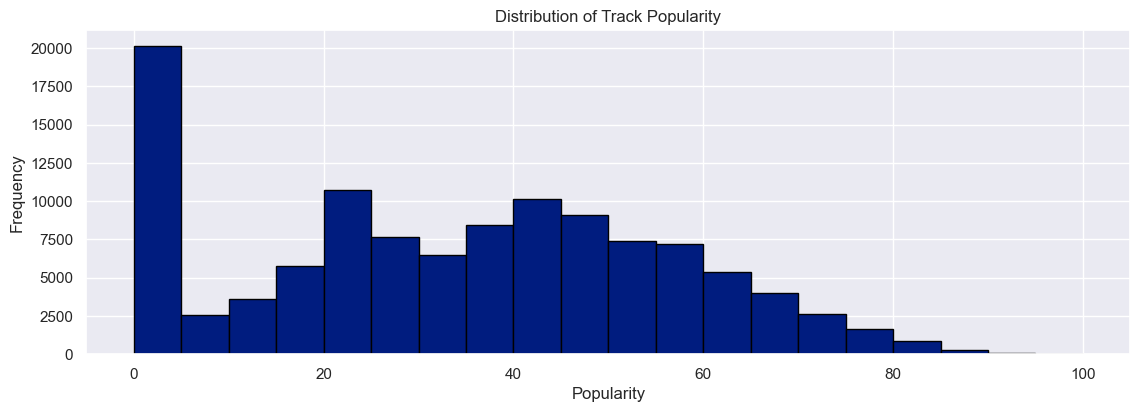

In [234]:
plt.figure(figsize=(12, 4))
plt.hist(df['popularity'], bins=20, edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Track Popularity')
plt.show()

* Box Plot for Popularity Distribution by Genre:
  - Understand the spread and central tendency of popularity within different genres.
  - X-axis: Genre
  - Y-axis: Popularity

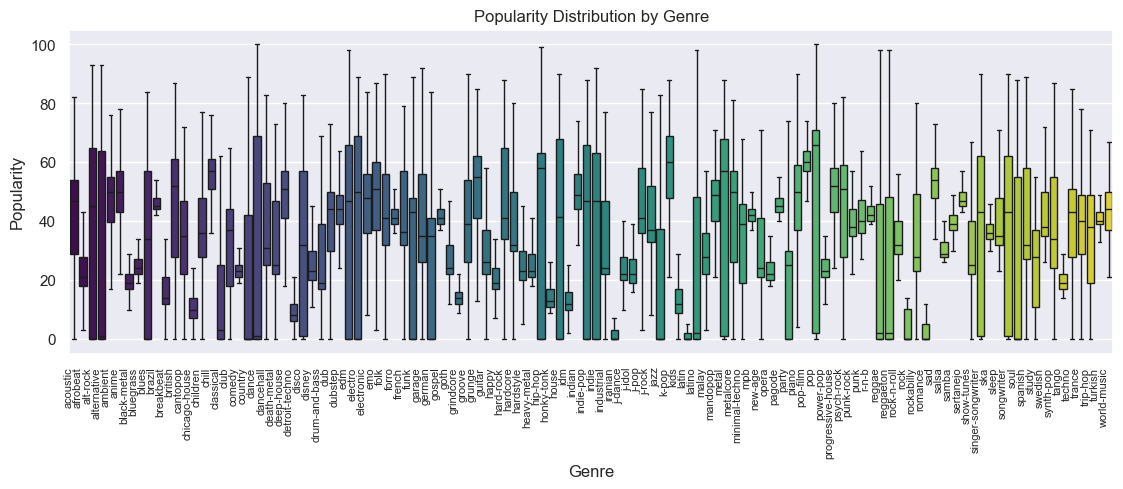

In [235]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='track_genre', y='popularity', data=df, palette='viridis', showfliers=False, zorder=2)
plt.title('Popularity Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=90, ha='right', fontsize=8)  # Rotate X labels, set alignment, and reduce font size
plt.show()

* Scatter Plot for Energy vs. Danceability:
  - Identify patterns and correlations between these musical features.
  - X-axis: Danceability
  - Y-axis: Energy
  - Hue: Popularity

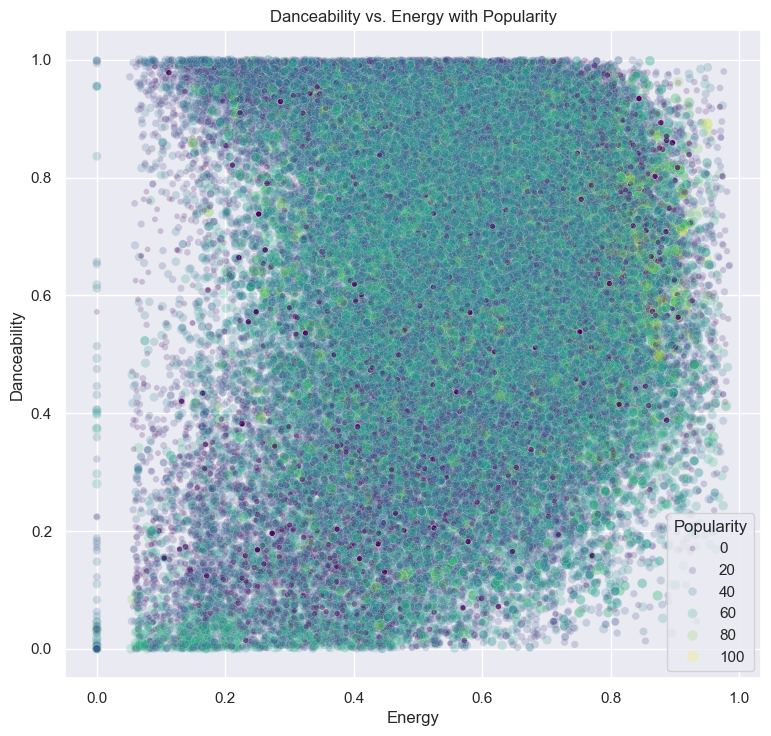

In [236]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='danceability', y='energy', hue='popularity', size='popularity', data=df, palette='viridis', alpha=0.2, s=2)
plt.title('Danceability vs. Energy with Popularity')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.legend(title='Popularity')
plt.show()

### 1.7. Find correlation between the variables 📈

In [237]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [238]:
# Remove non-numeric columns
numeric_columns = df.select_dtypes(include='number')
df_numeric = df[numeric_columns.columns]

# Use the corr method with the 'Pearson' method
corr_matrix = df_numeric.corr(method='pearson')

# Display the corr matrix
corr_matrix

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
Unnamed: 0,1.000000,0.032142,-0.032743,0.003444,-0.055994,-0.005520,-0.027307,0.005107,-0.084952,0.076840,-0.070286,0.033639,0.053111,-0.025824,-0.021115
popularity,0.032142,1.000000,-0.007101,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073
duration_ms,-0.032743,-0.007101,1.000000,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225
danceability,0.003444,0.035448,-0.073426,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218
energy,-0.055994,0.001056,0.058523,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126
key,-0.005520,-0.003853,0.008114,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065
loudness,-0.027307,0.050423,-0.003470,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992
mode,0.005107,-0.013931,-0.035556,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092
speechiness,-0.084952,-0.044927,-0.062600,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011
acousticness,0.076840,-0.025472,-0.103788,-0.171533,-0.733906,-0.040937,-0.589803,0.095553,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,-0.176138


Checking data correlation in exploratory analysis is important because it helps you understand the relationship between variables in a data set. Correlation is a statistical measure that indicates the strength and direction of the relationship between two variables.

By examining correlation, we can determine whether variables are positively correlated (i.e., when one increases, the other also increases), negatively correlated (when one increases, the other decreases), or uncorrelated (when there is no apparent relationship between the variables ).

Additionally, correlation also helps identify potential issues with the dataset, such as the presence of outliers or highly correlated variables, which can affect the accuracy of data analysis models.

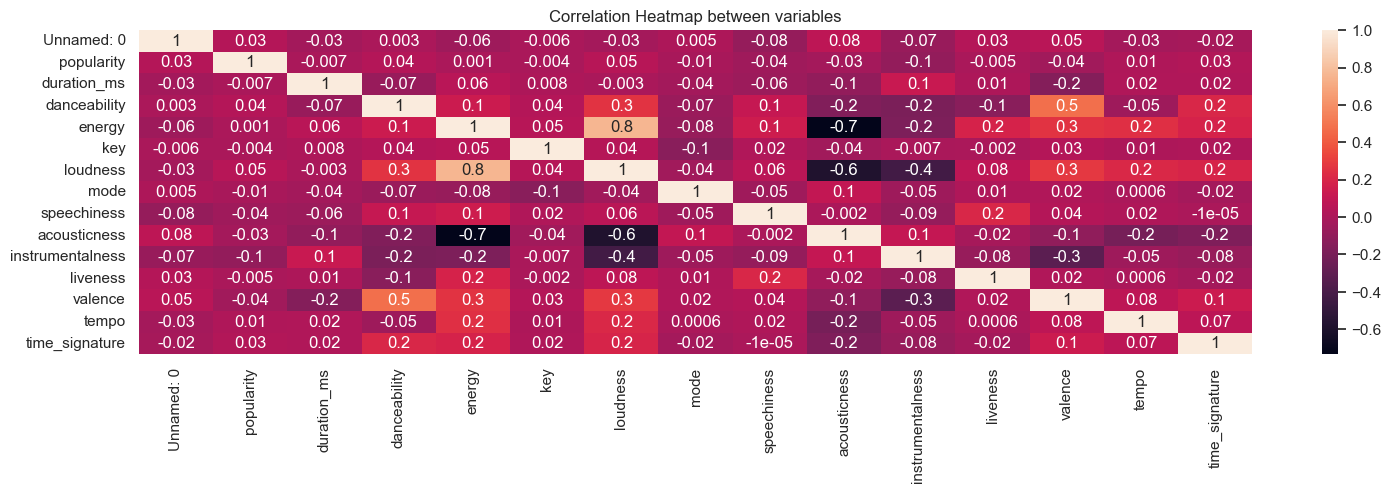

In [239]:
# Plotting the correlation matrix using Seaborn.
plt.figure(figsize=(16, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".1g")
plt.title("Correlation Heatmap between variables")
plt.show()  # Displaying the plot

We can see that the feature `loudness` and `energy` have a high correlation. In other words, when one increases, the other also increases.


## Chapter 2: Data Pre-process ⚙️

Normally, for this step we first remove duplicates, remove null values, strip extra whitespace from leading and trailing whitespace from starting, remove useless columns and normalize the values, leaving it on the same scale. Other thing good to do is to create columns to classify values.


### 2.1. Remove duplicates 🚫🔄

In [240]:
df = df.drop_duplicates()

### 2.2. Remove *null* values ❌🅾️

In [241]:
df = df.dropna()

### 2.3. Add classification columns ➕🏷️

In [242]:
# Create popularity classes
# Selecting rows where 'popularity' is greater than or equal to 80
df[df["popularity"] >= 80]

# Defining conditions for the 'pop_class' column
conditionlist = [
    (df['popularity'] >= 80),
    (df['popularity'] < 80)
]

# Assigning values based on conditions
choicelist = [1, 0]
df['pop_class'] = np.select(conditionlist, choicelist, default='Not Specified')

# Converting the 'pop_class' column to integer type
df['pop_class'] = df['pop_class'].astype(int)

### 2.4. Remove useless columns 🚫📊

In [243]:
df = df.drop(columns=['popularity', 'explicit'])

df.info()

# Keep only quantitative columns that are important for the model
df_quantitative = df
cols_to_drop = []
for column in df:
    if df[column].dtype == 'object':
        cols_to_drop.append(column)
df_quantitative = df.drop(columns=cols_to_drop)

df_quantitative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   duration_ms       113999 non-null  int64  
 6   danceability      113999 non-null  float64
 7   energy            113999 non-null  float64
 8   key               113999 non-null  int64  
 9   loudness          113999 non-null  float64
 10  mode              113999 non-null  int64  
 11  speechiness       113999 non-null  float64
 12  acousticness      113999 non-null  float64
 13  instrumentalness  113999 non-null  float64
 14  liveness          113999 non-null  float64
 15  valence           113999 non-null  float64
 16  tempo             113999 

### 2.5. Normalize the values 🔄📏

In [244]:
# Normalizing the data, bringing it to the same scale
df_quantitative_nm = (df_quantitative - df_quantitative.min()) / (df_quantitative.max() - df_quantitative.min())


## Chapter 3: Dataset division ➗

To split the dataset, it was separated into training and testing sets, with the test set being divided by 20% of the entire dataset and used only after the model is chosen and adjusted.

For the training data, it will be further divided into training and validation sets. The validation data will be used to compare different models and hyperparameters.

While models are tested and optimized, it's difficult to predict if they will perform well in production. Hence, initial monitoring is important to verify if it truly works or needs adjustments.

**1. Training Data**: 🏋️‍♂️ Used to train the model.

**2. Validation Data**: 🧪 Used for the comparison of different models and hyperparameters.

**3. Testing Data**: ✔️ Used to confirm that the model truly works. These data are ignored during training and the process of choosing hyperparameters.


### 3.1. Split the dataset for Training 🏋️‍♂️ and Testing ✔️

In [245]:
df_train, df_test = train_test_split(df_quantitative_nm, test_size=0.2, random_state=42, shuffle=True)

### 3.2. Visualize the proportions of the target variable ⚖️

In [246]:
# Visualizing the proportions of the target variable from the Training table
df_train['pop_class'].value_counts(normalize=True)

pop_class
0.0    0.989265
1.0    0.010735
Name: proportion, dtype: float64

In [247]:
# Visualizing the proportions of the target variable from the Testing table
df_test['pop_class'].value_counts(normalize=True)

pop_class
0.0    0.990263
1.0    0.009737
Name: proportion, dtype: float64

### 3.3. Divide in tables `x` and `y` 📅📅

In [248]:
X = df_train.drop('pop_class', axis=1)
y = df_train.pop_class

### 3.4. Separate the data by maintaining the percentage of samples in each class 🔃

In [249]:
StratifKfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### 3.5. Loop to split in Training 🏋️‍♂️ and Validation ✔️ tables

In [250]:
for train_index, val_index in StratifKfold.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

### 3.6. Checking the proportions of class 1 in the division 👍

In [251]:
print(f'Dimensions: {X_train.shape, X_val.shape, y_train.shape, y_val.shape}\n')
print(f"Proportion of df_train for class=1: {round(len(df_train[df_train.pop_class==1]) / df_train.shape[0], 4)}\n")
print(f"Proportion of X_train for class=1: {round(len(y_train[y_train==1]) / X_train.shape[0], 4)}")
print(f"Proportion of X_val for class=1: {round(len(y_val[y_val==1]) / X_val.shape[0], 4)}")

Dimensions: ((72960, 14), (18239, 14), (72960,), (18239,))

Proportion of df_train for class=1: 0.0107

Proportion of X_train for class=1: 0.0107
Proportion of X_val for class=1: 0.0107


The two sets have the same proportion in the response variable. From now on we will only work with the training data set and the test only for final validation.

So let's separate the training dataset into training and validation.


## Chapter 4: Baseline of the First Model 📈

 A baseline is the result of a very basic model/solution. You usually create a baseline and then try to do more complex solutions to get a better result. If you can get a better score than the baseline, that's good.

I started by dividing the data into training and validation (X - predictor variables, y - objective variable) and then used `StratifiedKFold`, which separates the data for cross validation while preserving the percentage of samples in each class.


In [252]:
# Instantiating the model
logReg = LogisticRegression()

# Training the model
logReg.fit(X_train, y_train)

# Predicting on training data
y_pred_base_train = logReg.predict(X_train)

# Predicting on validation data
y_pred_base_val = logReg.predict(X_val)

# Converting the coefficients from a logistic regression model (logReg) to list
logReg.coef_.tolist()[0]

# Removing `pop_class` column
df_coef = df_quantitative_nm.drop(columns='pop_class')

# Create a DataFrame with the Features and it coefficients
data = {
    "Features": df_coef.columns,
    "Coef": logReg.coef_.tolist()[0]
}
df_feat_coef = pd.DataFrame(data)
df_feat_coef

,Features,Coef
0,Unnamed: 0,0.359706
1,duration_ms,-0.944099
2,danceability,2.836162
3,energy,-1.506284
4,key,0.087213
5,loudness,4.731516
6,mode,-0.146503
7,speechiness,-0.675805
8,acousticness,-1.630397
9,instrumentalness,-2.789412



## Chapter 5: Model Validation 🧪

For this step, we'll check the evaluation metrics for a logistic regression model on both training and validation datasets, including accuracy, precision, recall, and F1 score.

In [253]:
print('In the TRAINING data:')

print('---' * 20)
print('Model: Logistic Regression (baseline)\n')
print(f"Accuracy:  {accuracy_score(y_train, y_pred_base_train)}")
print(f"Precision: {precision_score(y_train, y_pred_base_train)}")
print(f"Recall:    {recall_score(y_train, y_pred_base_train)}")
print(f"F1 Score:  {f1_score(y_train, y_pred_base_train)}")
print()
print('---' * 20)
print('---' * 20)
print()
print('In the VALIDATION data:')
print('---' * 20)
print('Model: Logistic Regression (baseline)\n')
print(f"Accuracy:  {accuracy_score(y_val, y_pred_base_val)}")
print(f"Precision: {precision_score(y_val, y_pred_base_val)}")
print(f"Recall:    {recall_score(y_val, y_pred_base_val)}")
print(f"F1 Score:  {f1_score(y_val, y_pred_base_val)}")
print('---' * 20)


In the TRAINING data:
------------------------------------------------------------
Model: Logistic Regression (baseline)

Accuracy:  0.9892543859649123
Precision: 0.0
Recall:    0.0
F1 Score:  0.0

------------------------------------------------------------
------------------------------------------------------------

In the VALIDATION data:
------------------------------------------------------------
Model: Logistic Regression (baseline)

Accuracy:  0.9893086243763364
Precision: 0.0
Recall:    0.0
F1 Score:  0.0
------------------------------------------------------------



## Chapter 6: Resample the data and fit the selected model 🔄🤖

In this step, we'll explore various techniques for handling imbalanced datasets in machine learning. It covers methods such as Random UnderSampling, Random Over-Sampling, SMOTE, and a Hybrid approach that combines oversampling and undersampling for effective data distribution.

### 6.1. Resample 🔄
First, we'll define a dictionary named `classifiers` that maps strings to instances of various machine learning classifiers.


In [254]:
# Classifiers dictionary
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(), 
    "Random Forest": RandomForestClassifier()
}

* **Distribution (Random UnderSampling)**:
  For this subsampling we will use one of the methods from the Near-miss family, from the imblearn library, which consists of selecting samples based on the distance between the majority class and the samples from the minority class, basically using the KNN model in its framework.

  There are 3 versions of this method: NearMiss1, NearMiss2 and NearMiss3. For this test, version 1 will be used, which is the default when we do not pass any parameters.


In [255]:
# Instantiating the method
undersample = NearMiss()

# Transforming the dataset
X_under, y_under = undersample.fit_resample(X_train, y_train)

# Summarizing the distribution of the new class
counter = Counter(y_under)
print(counter)
print('---' * 20)

# Metrics evaluation for each classifier
for name, model in classifiers.items():
    
    model.fit(X_under, y_under)
    y_pred = model.predict(X_val)
    
    print(f'Model:     {name}\n')
    print(f"Accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"Precision: {precision_score(y_val, y_pred)}")
    print(f"Recall:    {recall_score(y_val, y_pred)}")
    print(f"F1 Score:  {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Counter({0.0: 784, 1.0: 784})
------------------------------------------------------------
Model:     LogisiticRegression

Accuracy:  0.20247820604199793
Precision: 0.00788697620190659
Recall:    0.5897435897435898
F1 Score:  0.015565782349756361
------------------------------------------------------------
------------------------------------------------------------
Model:     KNearest

Accuracy:  0.23652612533581885
Precision: 0.007532281205164993
Recall:    0.5384615384615384
F1 Score:  0.01485673859214715
------------------------------------------------------------
------------------------------------------------------------
Model:     DecisionTreeClassifier

Accuracy:  0.2178299248862328
Precision: 0.011321803153434744
Recall:    0.8358974358974359
F1 Score:  0.022341008771929825
------------------------------------------------------------
------------------------------------------------------------
Model:     Random Forest

Accuracy:  0.08136410987444487
Precision: 0.0104647037956

* **Distribution (Random Over-Sampling)**:
  This method consists of adding a random set of copies of samples from the minority class to the data, which can increase the probability of overfitting, however, this can also result in an increase in the computational cost when adjusting the model, especially considering that the model will be seeing the same samples in the training set again.

In [256]:
# Instantiating the method
oversample = RandomOverSampler(sampling_strategy='minority')

# Transforming the dataset
X_over, y_over = oversample.fit_resample(X_train, y_train)

# Summarizing the distribution of the new class
counter = Counter(y_over)
print(counter)
print('---' * 20)

# Metrics evaluation for each classifier
for name, model in classifiers.items():
    
    model.fit(X_under, y_under)
    y_pred = model.predict(X_val)
    
    print(f'Model:     {name}\n')
    print(f"Accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"Precision: {precision_score(y_val, y_pred)}")
    print(f"Recall:    {recall_score(y_val, y_pred)}")
    print(f"F1 Score:  {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Counter({0.0: 72176, 1.0: 72176})
------------------------------------------------------------
Model:     LogisiticRegression

Accuracy:  0.20247820604199793
Precision: 0.00788697620190659
Recall:    0.5897435897435898
F1 Score:  0.015565782349756361
------------------------------------------------------------
------------------------------------------------------------
Model:     KNearest

Accuracy:  0.23652612533581885
Precision: 0.007532281205164993
Recall:    0.5384615384615384
F1 Score:  0.01485673859214715
------------------------------------------------------------
------------------------------------------------------------
Model:     DecisionTreeClassifier

Accuracy:  0.2310981961730358
Precision: 0.011584375220738857
Recall:    0.841025641025641
F1 Score:  0.022853957636566335
------------------------------------------------------------
------------------------------------------------------------
Model:     Random Forest

Accuracy:  0.08487307418169855
Precision: 0.0103300878

* **SMOTE (Over-Sampling)**:
The SMOTE Syntetic Minority Oversampling Technique consists of selecting a random sample from the chosen minority class first, then k nearest neighbors of that sample, then a neighbor is also randomly selected and a synthetic sample is created in that space between these two.

In [257]:
# Instantiating the method
oversample = SMOTE(sampling_strategy='minority')

# Transforming the dataset
X_over, y_over = oversample.fit_resample(X_train, y_train)

# Summarizing the distribution of the new class
counter = Counter(y_over)
print(counter)
print('---' * 20)

# Metrics evaluation for each classifier
for name, model in classifiers.items():
    
    model.fit(X_under, y_under)
    y_pred = model.predict(X_val)
    
    print(f'Model:     {name}\n')
    print(f"Accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"Precision: {precision_score(y_val, y_pred)}")
    print(f"Recall:    {recall_score(y_val, y_pred)}")
    print(f"F1 Score:  {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Counter({0.0: 72176, 1.0: 72176})
------------------------------------------------------------
Model:     LogisiticRegression

Accuracy:  0.20247820604199793
Precision: 0.00788697620190659
Recall:    0.5897435897435898
F1 Score:  0.015565782349756361
------------------------------------------------------------
------------------------------------------------------------
Model:     KNearest

Accuracy:  0.23652612533581885
Precision: 0.007532281205164993
Recall:    0.5384615384615384
F1 Score:  0.01485673859214715
------------------------------------------------------------
------------------------------------------------------------
Model:     DecisionTreeClassifier

Accuracy:  0.23153681671144252
Precision: 0.011521877429843784
Recall:    0.8358974358974359
F1 Score:  0.022730442058290338
------------------------------------------------------------
------------------------------------------------------------
Model:     Random Forest

Accuracy:  0.08750479741213882
Precision: 0.01041790

* **Hybrid (Oversampling and Undersampling)**:
Now matching the oversampling technique to the dataset and then applies subsampling to the output of the oversampling transformation, before returning the final result.

In [258]:
# Transforming the dataset
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

# Instantiating a pipeline with the two methods
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# Transforming the dataset
X_under_over, y_under_over = pipeline.fit_resample(X_train, y_train)

# Summarizing the distribution of the new class
counter = Counter(y_under_over)
print(counter)
print('---' * 20)

# Metrics evaluation for each classifier
for name, model in classifiers.items():
    
    model.fit(X_under, y_under)
    y_pred = model.predict(X_val)
    
    print(f'Model:     {name}\n')
    print(f"Accuracy:  {accuracy_score(y_val, y_pred)}")
    print(f"Precision: {precision_score(y_val, y_pred)}")
    print(f"Recall:    {recall_score(y_val, y_pred)}")
    print(f"F1 Score:  {f1_score(y_val, y_pred)}")
    print('---' * 20)
    print('---' * 20)

Counter({0.0: 14434, 1.0: 7217})
------------------------------------------------------------
Model:     LogisiticRegression

Accuracy:  0.20247820604199793
Precision: 0.00788697620190659
Recall:    0.5897435897435898
F1 Score:  0.015565782349756361
------------------------------------------------------------
------------------------------------------------------------
Model:     KNearest

Accuracy:  0.23652612533581885
Precision: 0.007532281205164993
Recall:    0.5384615384615384
F1 Score:  0.01485673859214715
------------------------------------------------------------
------------------------------------------------------------
Model:     DecisionTreeClassifier

Accuracy:  0.21596578759800428
Precision: 0.01102405879498024
Recall:    0.8153846153846154
F1 Score:  0.021754001915446707
------------------------------------------------------------
------------------------------------------------------------
Model:     Random Forest

Accuracy:  0.08130928230714403
Precision: 0.0102903779

### 6.2. Models evaluation 💥
After testing several models, I selected the one that performed a little better overall, `Random Forest`. The balancing method chosen was `Random Over-Sampling`.

* **Adjusting (tunning) the selected model**:
Let's define the hyperparameters to analyze the best performance with cross-validation, but first let's put the data in the format for the algorithm to receive.

A high range of hyperparameters was not defined because of the amount of data which, in addition to requiring a lot of computational power, will also take a long time, even with `RandomizedSearchCV` instead of `GridSearchCV`.

Cross-validation is a technique in which we evaluate whether the model generalizes, that is, whether the model performs well with different samples, without overfitting.

* **Defining hiperparameters**


In [259]:
# Data transformation from values to array
X_train_array = X_train.values
X_val_array = X_val.values
y_train_array = y_train.values
y_val_array = y_val.values

In [260]:
# HYPERPARAMETERS FOR RANDOM FOREST

# Number of trees
n_estimators = [3, 5, 10, 100]

# Number of features to consider at each split
max_features = [3, 4, 5, 6, None]

# Maximum depth of the tree
max_depth = [3, 4, 5, 6, None]

# Weights for each class
class_weight = ['balanced', None]

# Putting the defined parameters into a dictionary
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'class_weight': class_weight}

# Displaying the parameters
pprint(random_grid)

{'class_weight': ['balanced', None],
 'max_depth': [3, 4, 5, 6, None],
 'max_features': [3, 4, 5, 6, None],
 'n_estimators': [3, 5, 10, 100]}


* **Random Forest + Distribution (Random Over-Sampling)**

In [261]:
# Defining empty lists to store cross-validation results
accuracy_lst_rf = []
precision_lst_rf = []
recall_lst_rf = []
f1_lst_rf = []
auc_lst_rf = []

# Instantiating RandomizedSearchCV for cross-validation with the parameter grid
rf_grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, random_state=42)

# Starting time and counter for the loop
start = time.time()
count = 0

# Looping for cross-validation
for train, test in stratified_kfold.split(X_train_array, y_train_array):
    
    # Instantiating the pipeline with resampling technique
    pipeline_rf = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), rf_grid)
    
    # Executing the pipeline to train the model
    model_rf = pipeline_rf.fit(X_train_array[train], y_train_array[train])
    
    # Identifying the best parameters in training
    best_est_rf = rf_grid.best_estimator_
    
    # Making predictions with the training result
    prediction_rf = best_est_rf.predict(X_train_array[test])
    
    # Storing the results
    accuracy_lst_rf.append(pipeline_rf.score(X_train_array[test], y_train_array[test]))
    precision_lst_rf.append(precision_score(y_train_array[test], prediction_rf))
    recall_lst_rf.append(recall_score(y_train_array[test], prediction_rf))
    f1_lst_rf.append(f1_score(y_train_array[test], prediction_rf))
    auc_lst_rf.append(roc_auc_score(y_train_array[test], prediction_rf))
    
    # Identifying the current loop
    count = count + 1
    print(f"K-Fold number: {count}")
    
    # Measuring the time for each loop
    interval = time.time()
    print(f"Intermediate time: {(interval - start)/60:.1f} minutes")
    print()

print('---' * 20)
print(f"Best estimators for RF: {rf_grid.best_params_}")

# Printing the mean of cross-validation results
print('---' * 20)
print('Results')
print(f"Accuracy:  {np.mean(accuracy_lst_rf)}")
print(f"Precision: {np.mean(precision_lst_rf)}")
print(f"Recall:    {np.mean(recall_lst_rf)}")
print(f"F1 Score:  {np.mean(f1_lst_rf)}")
print(f"AUC:       {np.mean(auc_lst_rf)}")
print('---' * 20)

# Printing the total time for cross-validation
end = time.time()
print(f"Loop time for cross-validation: {(end - start)/60:.1f} minutes")

K-Fold number: 1
Intermediate time: 5.5 minutes

K-Fold number: 2
Intermediate time: 11.1 minutes

------------------------------------------------------------
Best estimators for RF: {'n_estimators': 100, 'max_features': 6, 'max_depth': None, 'class_weight': 'balanced'}
------------------------------------------------------------
Results
Accuracy:  0.9902686403508771
Precision: 0.6600670437879741
Recall:    0.2002551020408163
F1 Score:  0.3069758035281593
AUC:       0.5995525676464334
------------------------------------------------------------
Loop time for cross-validation: 11.1 minutes


### 6.3. Adjusted model evaluation 📈
* **Analysis of key ranking metrics**
**Random Forest with OverSampling**
  - Accuracy:  0.9902686403508771
  - Precision: 0.6568850267379679
  - Recall:    0.20408163265306123
  - F1 Score:  0.31077960883737776
  - AUC:       0.6014450504209664

Random Forest showed better metrics compared to the baseline established at the beginning, so I will continue with it.

* **ROC-AUC curve**
The Receiver Operating Characteristic Curve (ROC curve) is a graphical representation that illustrates the performance of a binary classifier system as its discrimination threshold varies. The ROC curve is also known as relative operating characteristic curve, because its change criterion is the result of the operation of two characteristics (TP and FP).

The `ROC Curve` has two parameters:
- True positive rate (True Positive Rate or TPR), which is given by TP/(TP + FN)
- False positive rate (False Positive Rate or FPR), which is given by FP / (FP + TN)

The higher to the left the value, the better, and we will create a function to perform cross validation by plotting the result of each of the splits and finally the average of the result.

AUC stands for "Area under the ROC Curve." AUC provides an aggregate measure of performance across all possible classification thresholds, i.e., as the probability that the model ranks a random positive example higher than a random negative example.

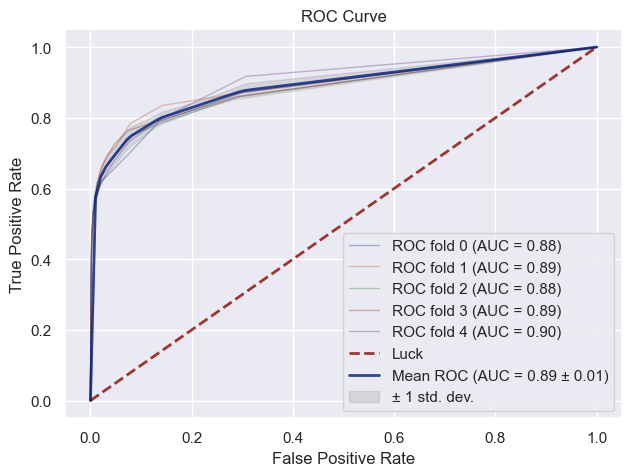

In [262]:
# Creating a function to plot the ROC curve
def draw_cv_roc_curve(classifier, cv, X, y, title='ROC Curve'):
    # Defining some empty lists to store the result
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    # Defining the counter
    i = 0
    
    # Loop for cross-validation
    for train, test in cv.split(X, y):
        
        # Executing the function and storing the probability results
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        
        # Computing the ROC curve and AUC
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        # Plotting the ROC curve for each cross-validation fold individually
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    
    # Plotting the diagonal line as a reference for the 50/50 rate
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # Calculating the means and standard deviation
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    # Plotting ROC curve with the mean results
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f ± %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label='± 1 std. dev.')
    
    # Customizing the plot
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(title)
    plt.legend(loc="lower right")
    
    # Displaying the plot
    plt.show()

# Executing the function and plotting the ROC AUC curve
draw_cv_roc_curve(best_est_rf, StratifKfold, X_train, y_train, title='ROC Curve')

### 6.4. Final Model 📊
After validating our model, we will use all the X and y data from the training dataset for the final model with the best hyperparameters found in the validation, define the pipeline and train the model.

* **Model training**:
We will train the model with the best hyperparameters found, run the pipeline with Oversampling and Random Forest adjusted and finally, the model will be trained.

[0.20282421862739974, 0.06763223738917885, 0.08264815924290225, 0.09790933898989655, 0.02491338944621747, 0.0986987840631018, 0.004769541142059114, 0.06104745515102793, 0.08012536558613922, 0.0835313732456474, 0.0637504156909004, 0.06839841919065051, 0.06018168271206872, 0.003569619522810063]


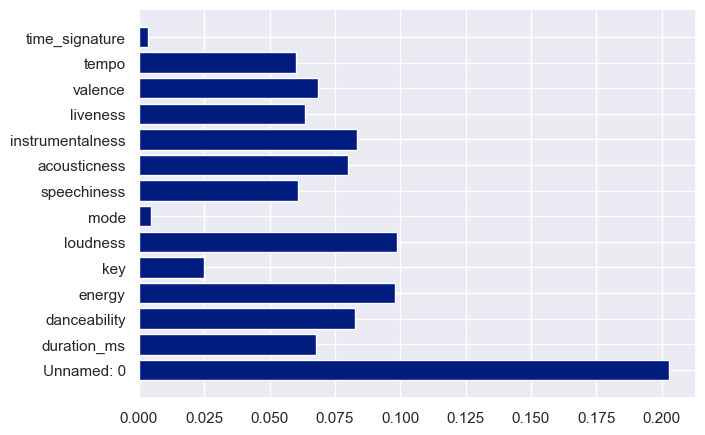

In [263]:
# Separating the data again
X_all = df_train.drop('pop_class', axis=1)
y_all = df_train.pop_class

# Instantiating the final model with the parameters found in cross-validation
final_model = rf_grid.best_estimator_

# Defining the pipeline for oversampling and the final model
pipeline = imbalanced_make_pipeline(RandomOverSampler(sampling_strategy='minority'), final_model)

# Training the model with the adjusted parameters using all the data
model = pipeline.fit(X_all, y_all)

# Retrieving the second step of the pipeline, the model object
model.steps[1]

# Extracting feature importances
feat_imp = model.steps[1][1].feature_importances_

# Printing the feature importances
print(feat_imp.tolist())

# Plotting the feature importances
names = df_quantitative_nm.columns
plt.barh(df_quantitative_nm.drop(columns=['pop_class']).columns.tolist(), feat_imp.tolist())
plt.show()

The features `loudness` and `energy` have a high importance coefficient in the model. However, as we saw at the beginning, these two features have a high correlation. It may be interesting to go back to the data pre-processing stage to eliminate the high correlation.

* **Suggestion for removing correlation in the preprocessing step**

In [264]:
'''
Function that analyzes the correlation between variables in the database, creates a
mask to remove mirrored data, and returns the data without variables
with a correlation greater than the specified cutoff value of 0.95.
'''

def remove_corr_var(data, cutoff_value=0.95):

  corr_matrix = data.iloc[:, 4:-2].corr().abs()
  upper_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
  to_exclude = [column for column in upper_matrix.columns if any(upper_matrix[column] > cutoff_value)]
  
  return data.drop(to_exclude, axis=1)


## Chapter 7: Apply the result to the test data and save the result 💾

### 7.1. Preparation, prediction and evaluation on test data 📚🔍💡
Here, the test data set is used, which was divided at the beginning, with 20% of the total data.

Furthermore, the data was separated and the input of new data was simulated to find out if our model generalizes well, the expected result is a little lower than what was validated. If it is much lower than expected, it is necessary to re-adjust the model because it resulted in overfitting.

Accuracy:  0.992719298245614
Precision: 0.8111111111111111
Recall:    0.32882882882882886
F1:        0.46794871794871806


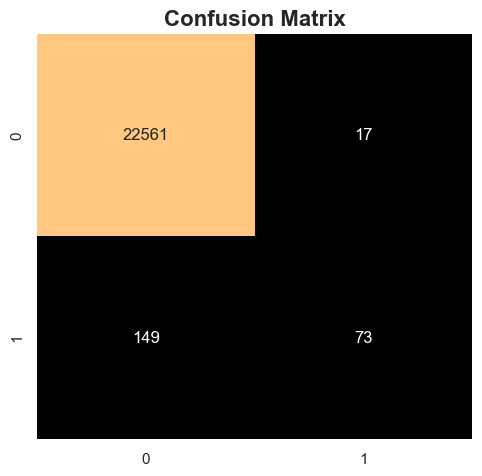

,Accuracy,Precision,Recall,F1
Baseline,0.989309,0.000000,0.000000,0.000000
Validation,0.990269,0.660067,0.200255,0.306976
Test,0.992719,0.811111,0.328829,0.467949


In [265]:
# Separating test data
X_test = df_test.drop('pop_class', axis=1)
y_test = df_test.pop_class

# Making predictions on test data
y_pred_test = model.predict(X_test)

# Printing the results
print(f"Accuracy:  {accuracy_score(y_test, y_pred_test)}")
print(f"Precision: {precision_score(y_test, y_pred_test)}")
print(f"Recall:    {recall_score(y_test, y_pred_test)}")
print(f"F1:        {f1_score(y_test, y_pred_test)}")
# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap=plt.cm.copper, fmt='g', cbar=False)
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.show()

# Storing the result in a DataFrame
pd.DataFrame(index=['Baseline', 'Validation', 'Test'], 
             data = {"Accuracy": [accuracy_score(y_val, y_pred_base_val), np.mean(accuracy_lst_rf), accuracy_score(y_test, y_pred_test)], 
                     "Precision": [precision_score(y_val, y_pred_base_val), np.mean(precision_lst_rf), precision_score(y_test, y_pred_test)],
                     "Recall": [recall_score(y_val, y_pred_base_val), np.mean(recall_lst_rf), recall_score(y_test, y_pred_test)],
                     "F1": [f1_score(y_val, y_pred_base_val), np.mean(f1_lst_rf), f1_score(y_test, y_pred_test)]}
            )

### 7.2. Saving the results 💾
Before executing, the folder `model_v1` must be created.

In [266]:
# Saving the trained model in the current directory
pkl_filename_model = "model_v1/RandomForestModel.pkl"
with open(pkl_filename_model, 'wb') as file:
    pickle.dump(model, file)

In [267]:
# Storing predictions in the test dataframe
df_test['Predicted'] = y_pred_test

# Comparing actual with predicted in the dataframe
df_test['Correct?'] = np.where(df_test['pop_class'] == df_test['Predicted'], 'Yes', 'No')

In [268]:
df_test.head()

,Unnamed: 0,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_class,Predicted,Correct?
113186,0.992868,0.082556,0.374619,0.598,0.636364,0.786989,1.0,0.031503,0.005131,0.00000,0.176,0.046834,0.608180,0.8,0.0,0.0,Yes
42819,0.375609,0.016323,0.173604,0.997,0.636364,0.849842,1.0,0.122280,0.005231,0.80100,0.420,0.029548,0.502206,0.8,0.0,0.0,Yes
59311,0.520276,0.039205,0.175635,0.803,0.818182,0.729889,0.0,0.149223,0.615462,0.00191,0.195,0.089146,0.310488,0.6,0.0,0.0,Yes
90417,0.793139,0.026416,0.425381,0.382,0.818182,0.667610,1.0,0.033368,0.321285,0.00000,0.106,0.464322,0.345911,0.8,0.0,0.0,Yes
61000,0.535092,0.043549,0.563452,0.941,0.818182,0.855243,0.0,0.049845,0.485944,0.00000,0.266,0.817085,0.380023,0.8,0.0,0.0,Yes


In [269]:
df_test[df_test['pop_class'] == 1.0]

,Unnamed: 0,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,pop_class,Predicted,Correct?
89916,0.788744,0.042480,0.885279,0.588,0.000000,0.800085,1.0,0.050984,0.276104,0.000000,0.1700,0.934673,0.583485,0.8,1.0,0.0,No
31375,0.275222,0.029200,0.695431,0.886,0.000000,0.838873,1.0,0.035233,0.028112,0.000000,0.4810,0.618090,0.513757,0.8,1.0,0.0,No
11010,0.096580,0.041331,0.613198,0.366,0.454545,0.777093,1.0,0.029223,0.580321,0.000000,0.1330,0.130653,0.583391,0.8,1.0,1.0,Yes
32004,0.280739,0.037745,0.658883,0.716,0.727273,0.816825,1.0,0.036166,0.086647,0.000026,0.1350,0.163819,0.410844,0.8,1.0,1.0,Yes
20364,0.178633,0.042899,0.574619,0.885,0.727273,0.832418,1.0,0.084767,0.096185,0.000100,0.3340,0.305528,0.373872,0.8,1.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67701,0.593874,0.044697,0.820305,0.970,0.909091,0.803378,0.0,0.052435,0.057129,0.000061,0.1540,0.872362,0.469766,0.8,1.0,0.0,No
100051,0.877648,0.032814,0.530964,0.943,0.090909,0.838429,1.0,0.034922,0.007068,0.000038,0.0579,0.769849,0.409279,0.8,1.0,0.0,No
57034,0.500303,0.038819,0.724873,0.800,1.000000,0.827239,0.0,0.052228,0.127510,0.000000,0.3590,0.591960,0.550606,0.8,1.0,1.0,Yes
9000,0.078948,0.028469,0.860914,0.821,0.181818,0.816140,0.0,0.054611,0.016968,0.000403,0.0962,0.250251,0.513827,0.8,1.0,0.0,No
